In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import statistics
from scipy.stats import kruskal

In [2]:
df = pd.read_csv('nyc-rolling-sales.csv', na_values =[' -  '])
df

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000.0,1496.0,1925,1,B2,460000.0,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033.0,64117.0,2001,4,K6,11693337.0,2016-12-21 00:00:00


In [3]:
df.isna().sum()

Unnamed: 0                            0
BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
EASE-MENT                             0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

In [4]:
df['SALE PRICE'].median()

530000.0

In [5]:
df['SALE PRICE'].fillna(530000, inplace=True)

# A. Mean

**Question**  // Berapakah rata-rata sale price NYC Property Sales?

**Pre-processing as needed**

In [6]:
df['SALE PRICE'].mean()

1147900.4933174055

**Conclusion**

Rata-rata sale price NYC Property Sales adalah 1276456.497764

# B. Median

**Question**  // Berapakah median sale price NYC Property Sales?

**Pre-processing as needed**

In [7]:
df['SALE PRICE'].median()

530000.0

**Conclusion**

Median sale price NYC Property Sales adalah 530000

# C. Modus

**Question**  // Berapakah modus sale price NYC Property Sales?

**Pre-processing as needed**

In [8]:
df['SALE PRICE'].mode()

0    530000.0
dtype: float64

**Conclusion**

Modus Sale price NYC Property Sales adalah 530000

# D. Range

**Question**  // Berapakah jangkauan sale price NYC Property Sales?

**Pre-processing as needed**

In [9]:
maxi = df['SALE PRICE'].max()
maxi

2210000000.0

In [10]:
mini = df['SALE PRICE'].min()
mini

0.0

In [11]:
jangkauan = maxi-mini
jangkauan

2210000000.0

**Conclusion**

Range Sale price NYC Property Sales adalah 2210000000

# E. Variance

**Question**  // Berapakah varians sale price NYC Property Sales?

**Pre-processing as needed**

In [12]:
df['SALE PRICE'].var()

107756447924177.75

**Conclusion**

Variance Sale price NYC Property Sales adalah 107756447924177.75

# F. Standard Deviation

**Question**  // Berapakah standar deviasi sale price NYC Property Sales?

**Pre-processing as needed**

In [13]:
statistics.stdev(df['SALE PRICE'])

10380580.326948069

**Conclusion**

Standar deviasi Sale price NYC Property Sales adalah 10380580.32695

# G. Probability Distribution

**Question**  // Berapakah standar deviasi sale price NYC Property Sales?

**Pre-processing as needed**

In [14]:
a = df['SALE PRICE'].sample(4000, random_state=1)

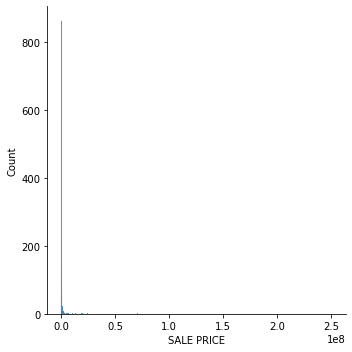

In [15]:
sns.displot(a)

**Conclusion**

Distribusi data Sale price NYC Property Sales right skewed

# H. Confidence Intervals

**Question**  // Berapakah confidence interval dari sale price pada borough dengan value terbanyak?

**Pre-processing as needed**

In [16]:
df['BOROUGH'].value_counts().head(5)

4    26736
3    24047
1    18306
5     8410
2     7049
Name: BOROUGH, dtype: int64

In [17]:
mean = df[df['BOROUGH']==4]['SALE PRICE'].mean()
stdev = df[df['BOROUGH']==4]['SALE PRICE'].std()
n = len(df[df['BOROUGH']==4])
z = 1.96 #Confidence Level 95%

In [18]:
se = stdev/np.sqrt(n)

In [19]:
lb = mean-z*se
ub= mean+z*se
print('Confidence Interval: ['+ str(lb) + ' , '+ str(ub) +']')

Confidence Interval: [642568.38103438 , 706998.105051796]


**Conclusion**

Rata-rata sale price pada Borough 4 yang sebenarnya berada di antara 642568.38 sampai 706998.11 dengan tingkat kepercayaan sebesar 95%

# I. Hypothesis Testing

**Question**  // Apakah distribusi sale price dari masing borough sama?

**Pre-processing as needed**

In [20]:
df['BOROUGH'].unique()

array([1, 2, 3, 4, 5], dtype=int64)

In [21]:
data = {'1':[]}
data = pd.DataFrame(data)
data

,1


In [22]:
dfh = df[['BOROUGH', 'SALE PRICE']]

In [23]:
dfh1 = dfh[dfh['BOROUGH']==1].head(5000)
dfh1.reset_index(drop=True)

,BOROUGH,SALE PRICE
0,1,6625000.0
1,1,530000.0
2,1,530000.0
3,1,3936272.0
4,1,8000000.0
...,...,...
4995,1,1244026.0
4996,1,1600000.0
4997,1,18000000.0
4998,1,18000000.0


In [24]:
dfh2 = dfh[dfh['BOROUGH']==2].head(5000)
dfh2.reset_index(drop=True)

,BOROUGH,SALE PRICE
0,2,140000.0
1,2,420000.0
2,2,127000.0
3,2,273796.0
4,2,231244.0
...,...,...
4995,2,0.0
4996,2,750000.0
4997,2,300000.0
4998,2,0.0


In [25]:
dfh3 = dfh[dfh['BOROUGH']==3].head(5000)
dfh3.reset_index(drop=True)

,BOROUGH,SALE PRICE
0,3,800000.0
1,3,0.0
2,3,0.0
3,3,1200000.0
4,3,1090000.0
...,...,...
4995,3,425000.0
4996,3,670000.0
4997,3,525000.0
4998,3,550000.0


In [26]:
dfh4 = dfh[dfh['BOROUGH']==4].head(5000)
dfh4.reset_index(drop=True)

,BOROUGH,SALE PRICE
0,4,792000.0
1,4,10.0
2,4,275500.0
3,4,970000.0
4,4,1400000.0
...,...,...
4995,4,562000.0
4996,4,631000.0
4997,4,530000.0
4998,4,660000.0


In [27]:
dfh5 = dfh[dfh['BOROUGH']==5].head(5000)
dfh5.reset_index(drop=True)

,BOROUGH,SALE PRICE
0,5,530000.0
1,5,437500.0
2,5,530000.0
3,5,579000.0
4,5,530000.0
...,...,...
4995,5,300000.0
4996,5,314900.0
4997,5,305000.0
4998,5,530000.0


In [28]:
list1 = list(dfh1['SALE PRICE'])
data['1'] = list1
list2 = list(dfh2['SALE PRICE'])
data['2'] = list2
list3 = list(dfh3['SALE PRICE'])
data['3'] = list3
list4 = list(dfh4['SALE PRICE'])
data['4'] = list4
list5 = list(dfh5['SALE PRICE'])
data['5'] = list5
data

,1,2,3,4,5
0,6625000.0,140000.0,800000.0,792000.0,530000.0
1,530000.0,420000.0,0.0,10.0,437500.0
2,530000.0,127000.0,0.0,275500.0,530000.0
3,3936272.0,273796.0,1200000.0,970000.0,579000.0
4,8000000.0,231244.0,1090000.0,1400000.0,530000.0
...,...,...,...,...,...
4995,1244026.0,0.0,425000.0,562000.0,300000.0
4996,1600000.0,750000.0,670000.0,631000.0,314900.0
4997,18000000.0,300000.0,525000.0,530000.0,305000.0
4998,18000000.0,0.0,550000.0,660000.0,530000.0


**Interpretation**
- H0: distribusi dari masing-masing borough adalah sama
- H1: distribusi dari masing-masing borough tidak sama

**Kruskal Wallis Test**

In [33]:
stat,p = kruskal(list1,list2,list3,list4,list5)
print('stat=%.3f,p=%.3f'%(stat,p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=6123.929,p=0.000
Probably different distributions


**Conclusion**

Distribusi dari masing-masing borough tidak sama